%
% caso 1: 0<f'(x*)<1    %
f = @(x) 1 + exp(x)/10;   x0=2.2;
% caso 2: -1<f'(x*)<0   %f = @(x) 2 - exp(x)/10;   x0=0.2;
% caso 3: 1<f'(x*)      %f = @(x) exp(x) - 1.7183; x0=1.01;
% caso 4: f'(x*)<-1     %f = @(x) 3.7183 - exp(x); x0=1.01;
% caso 5: f'(x*)=0      %f = @(x) (x-1).^2 + 1;    x0 = 1.7;



# Método del punto fijo o de aproximaciones sucesivas

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Algunos casos de ejemplo. **Correr solo la celda con el caso que se quiere probar.** También se puede cambiar la semilla (x0).
1. $0<f'(x^*)<1$
2. $-1<f'(x^*)<0$
3. $1<f'(x^*)$
4. $f'(x^*)<-1$
5. $f'(x*)=0$

In [33]:
#Caso 1
def f(x):
    return 1 + np.exp(x)/10  

x0=2.2

plt_title = r'Caso 1, $0<f^\prime(x^*)<1$'

In [36]:
#Caso 2
def f(x):
    return 2 - np.exp(x)/10  

x0=0.2
plt_title = r'Caso 2, $-1<f^\prime(x^*)<0$'

In [39]:
#Caso 3
def f(x):
    return np.exp(x) - 1.7183

x0=1.01
plt_title = r'Caso 3, $1<f^\prime(x^*)$'

In [48]:
#Caso 4
def f(x):
    return 3.7183 - np.exp(x)

x0=1.01
plt_title = r'Caso 4, $f^\prime(x^*)<-1$'

In [49]:
#Caso 5
def f(x):
    return (x-1)**2 + 1

x0=1.7
plt_title = r'Caso 4, $f^\prime(x*)=0$'

In [50]:
tol = 1e-6 # Tolerancia: cuando la diferencia entre una aproximación y la siguente sea menor, se detiene
kmax=10 # Número máximo de iteraciones

# Extremos del intervalo de graficación de f(x)
xmin=0
xmax=2.49

# Genera los vectores para graficar, los xg están equiespaciados
xg=np.linspace(xmin,xmax,100)
yg=f(xg)


# Guarda primer punto de la secuencia (x0,0)
x = [x0]
y = [0]

# Inicialización: semilla
xprev = x0
# Inicialización: correcci'on inicial (arbitraria)
corr = 2*tol
# Inicialización: contador
k = 0

# Condiciones de parada:
# - correcci'on menor o igual que tol
# - contador mayor o igual que kmax
# - norma de x mayor o igual que 3

while corr > tol and k < kmax and np.linalg.norm(xprev)<3:
    k += 1    # incrementa contador
# iteración propiamente dicha:  
    xnext=f(xprev)
# Guarda un par de puntos de la secuencia:
# -Punto sobre y=f(x)0 
    x.append(xprev)
    y.append(xnext)
# -Punto sobre y=x
    x.append(xnext)
    y.append(xnext)
# Calcula cuánto fue la corrección
    corr=np.linalg.norm(xnext-xprev)
# Guarda último valor de la aproximación en xprev
    xprev = xnext


Text(0.5, 1.0, 'Caso 4, $f^\\prime(x*)=0$')

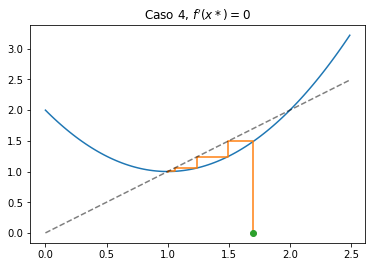

In [51]:
# Grafica: y=x, y=f(x), puntos de la secuencia y la recta y=x
plt.plot(xg, yg)
plt.plot(x, y)
plt.plot(xg,xg, 'k', alpha = 0.5, ls = 'dashed')
plt.plot(x0, 0, 'o') # semilla inicial
plt.title(plt_title)